<a href="https://colab.research.google.com/github/julianacholder/signmeet/blob/main/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
RSL Dataset Categories: ['Iminsi', 'Inyuguti', 'Urabaza', 'Inshinga', 'Interuro', 'Izina']

Videos found per category:
  Iminsi/Umunsi: 25 videos
  Inyuguti/Z: 6 videos
  Inyuguti/Y: 5 videos
  Inyuguti/S: 3 videos
  Inyuguti/U: 6 videos
  Inyuguti/R: 4 videos
  Inyuguti/P: 6 videos
  Inyuguti/V: 5 videos
  Inyuguti/X: 5 videos
  Inyuguti/T: 5 videos
  Inyuguti/W: 4 videos
  Inyuguti/Q: 5 videos
  Inyuguti/i: 6 videos
  Inyuguti/O: 5 videos
  Inyuguti/N: 5 videos
  Inyuguti/H: 5 videos
  Inyuguti/L: 3 videos
  Inyuguti/F: 4 videos
  Inyuguti/G: 10 videos
  Inyuguti/M: 4 videos
  Inyuguti/J: 4 videos
  Inyuguti/K: 4 videos
  Inyuguti/A: 2 videos
  Inyuguti/D: 4 videos
  Inyuguti/B: 4 videos
  Inyuguti/E: 4 videos
  Inyuguti/C: 4 videos
  Urabaza/Hehe: 3 videos
  Urabaza/Ryari: 15 videos
  Urabaza/Inde: 7 videos
  Inshinga/Mfasha: 60 videos
  Inshinga/Kugira: 6

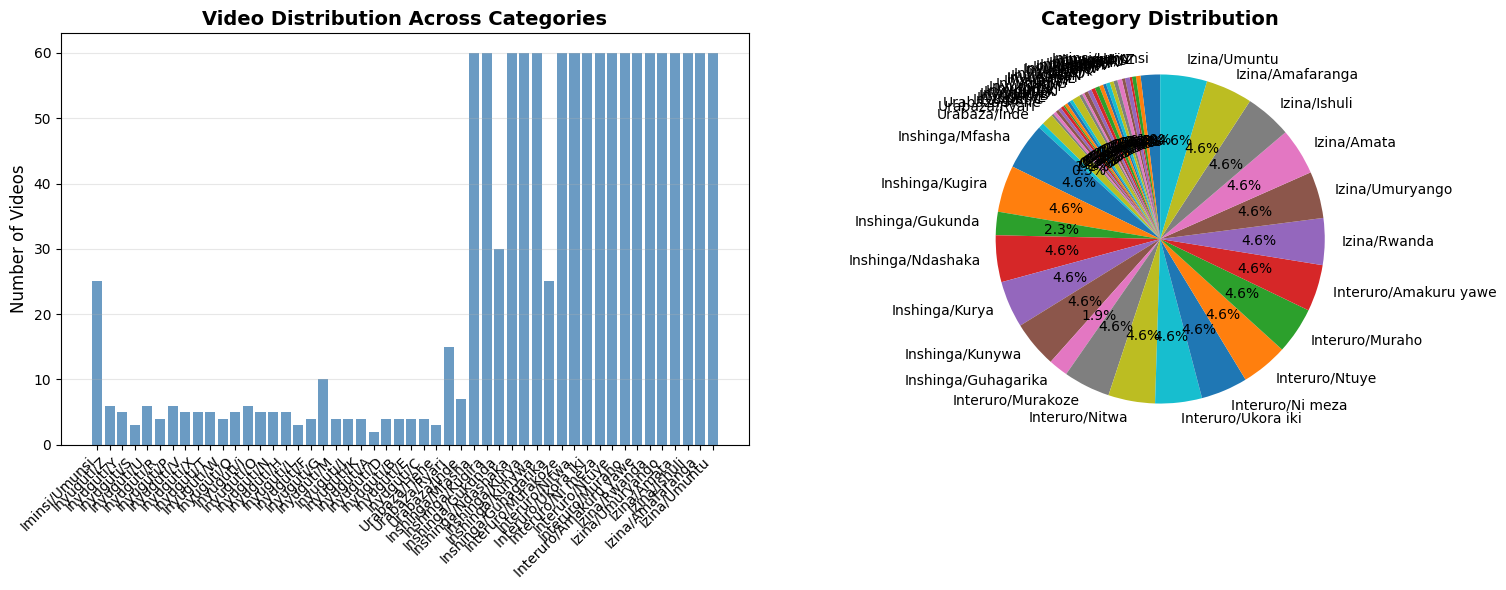

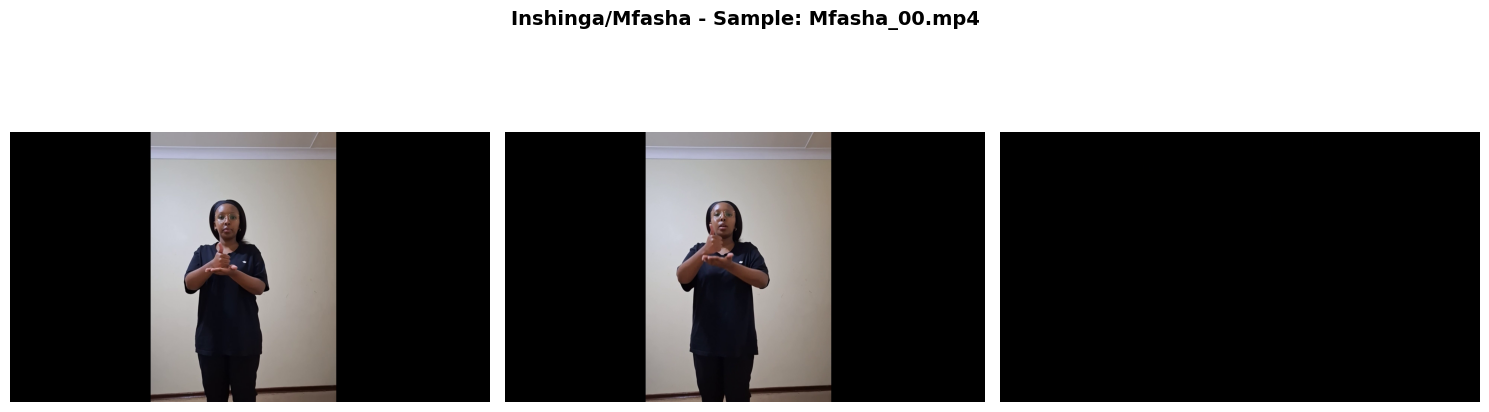

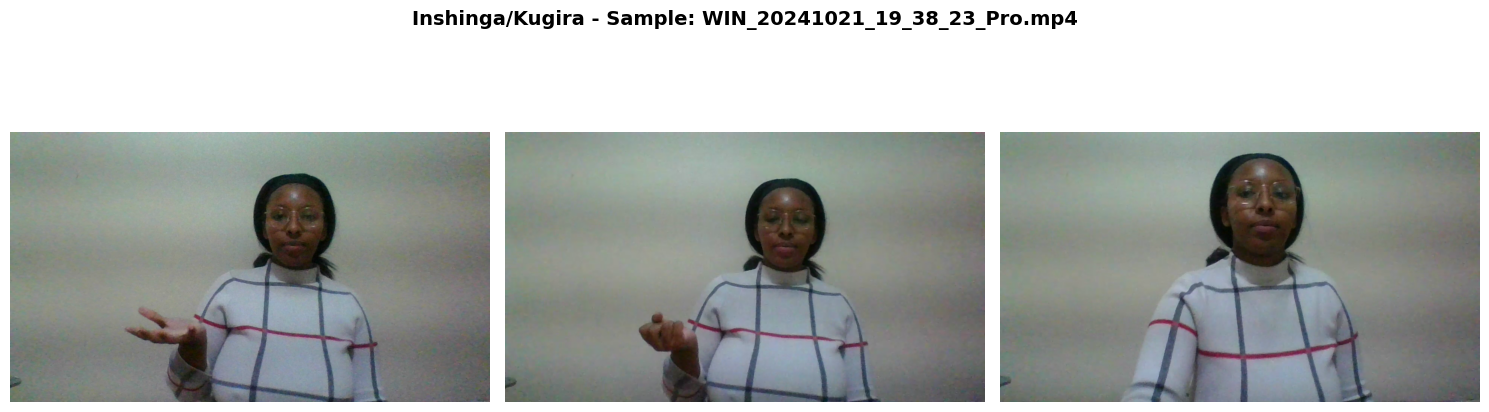

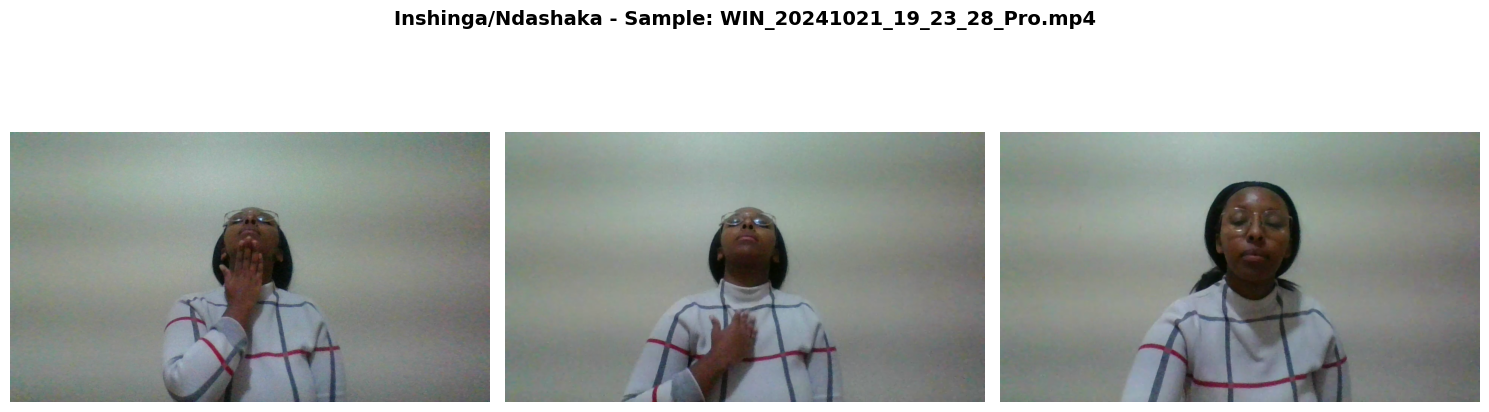


VIDEO QUALITY ANALYSIS (Sample)
Iminsi/Umunsi:
  Resolution: 1280x720
  FPS: 30.0
Inyuguti/Z:
  Resolution: 1280x720
  FPS: 30.0
Inyuguti/Y:
  Resolution: 1280x720
  FPS: 30.0


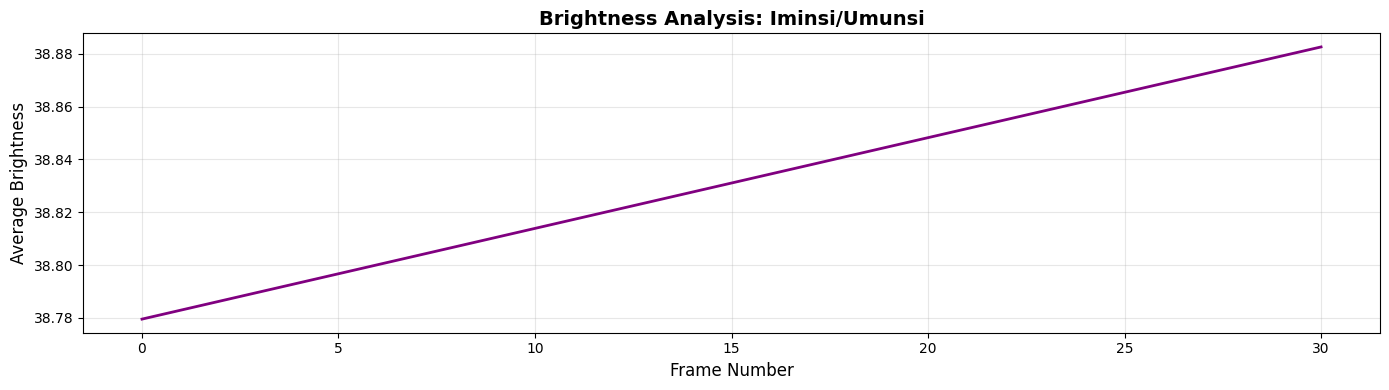


COMPLETE DATASET SUMMARY
Category                  Videos     Sample Duration (s) 
------------------------------------------------------------
Iminsi/Umunsi             25         1.07                
Inyuguti/Z                6          1.00                
Inyuguti/Y                5          1.00                
Inyuguti/S                3          0.80                
Inyuguti/U                6          1.00                
Inyuguti/R                4          1.07                
Inyuguti/P                6          1.00                
Inyuguti/V                5          1.07                
Inyuguti/X                5          1.07                
Inyuguti/T                5          1.07                
Inyuguti/W                4          1.07                
Inyuguti/Q                5          1.07                
Inyuguti/i                6          1.00                
Inyuguti/O                5          0.80                
Inyuguti/N                5          0.87  


✅ Dataset visualization complete!
This analysis covers:
  ✓ Video distribution across categories
  ✓ Sample frames from each category
  ✓ Video quality metrics (resolution, FPS)
  ✓ Brightness analysis
  ✓ Complete dataset statistics


In [8]:
"""
RSL Dataset Visualization for Capstone Demo
Rwanda Sign Language Video Analysis
"""

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive
from IPython.display import Video, display

# Mount Drive
drive.mount('/content/drive')

# ================================
# CONFIGURATION
# ================================
BASE_DIR = "/content/drive/.shortcut-targets-by-id/14kNcoxjG_eUM7iVgU1sMPg4KKaWBVR3X/RSL_Dataset"

# Get all categories
categories = os.listdir(BASE_DIR)
print(f"RSL Dataset Categories: {categories}\n")

# Collect all videos from all categories
all_videos = {}
for category in categories:
    category_path = os.path.join(BASE_DIR, category)

    # Check for videos directly in category
    videos = [f for f in os.listdir(category_path) if f.endswith('.mp4')]

    # If no videos, check subfolders
    if len(videos) == 0:
        subfolders = [d for d in os.listdir(category_path) if os.path.isdir(os.path.join(category_path, d))]
        for subfolder in subfolders:
            subfolder_path = os.path.join(category_path, subfolder)
            sub_videos = [f for f in os.listdir(subfolder_path) if f.endswith('.mp4')]
            if len(sub_videos) > 0:
                all_videos[f"{category}/{subfolder}"] = (subfolder_path, sub_videos)
    else:
        all_videos[category] = (category_path, videos)

print("Videos found per category:")
for cat, (path, vids) in all_videos.items():
    print(f"  {cat}: {len(vids)} videos")

# ================================
# 1. DATASET OVERVIEW STATISTICS
# ================================
print("\n" + "="*60)
print("DATASET STATISTICS")
print("="*60)

total_videos = sum(len(vids) for _, vids in all_videos.values())
print(f"Total Categories: {len(all_videos)}")
print(f"Total Videos: {total_videos}")

# Calculate total duration (sample first video from each category)
total_duration = 0
for cat, (path, vids) in all_videos.items():
    if len(vids) > 0:
        sample_path = os.path.join(path, vids[0])
        cap = cv2.VideoCapture(sample_path)
        fps = cap.get(cv2.CAP_PROP_FPS)
        frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        duration = frames / fps if fps > 0 else 0
        total_duration += duration * len(vids)  # Estimate total
        cap.release()

print(f"Estimated Total Duration: {total_duration/60:.1f} minutes")
print("="*60)

# ================================
# 2. VISUALIZE VIDEO DISTRIBUTION
# ================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Video count by category
cat_names = list(all_videos.keys())
cat_counts = [len(vids) for _, vids in all_videos.values()]

axes[0].bar(range(len(cat_names)), cat_counts, color='steelblue', alpha=0.8)
axes[0].set_xticks(range(len(cat_names)))
axes[0].set_xticklabels(cat_names, rotation=45, ha='right')
axes[0].set_ylabel('Number of Videos', fontsize=12)
axes[0].set_title('Video Distribution Across Categories', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
axes[1].pie(cat_counts, labels=cat_names, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Category Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# ================================
# 3. SAMPLE FRAMES FROM EACH CATEGORY
# ================================
def extract_frames(video_path, num_frames=3):
    """Extract evenly spaced frames"""
    cap = cv2.VideoCapture(video_path)
    total = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frames = []

    for i in np.linspace(0, total-1, num_frames, dtype=int):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)
        ret, frame = cap.read()
        if ret:
            frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    cap.release()
    return frames

# Show samples from top 3 categories
top_categories = sorted(all_videos.items(), key=lambda x: len(x[1][1]), reverse=True)[:3]

for cat, (path, vids) in top_categories:
    if len(vids) > 0:
        video_path = os.path.join(path, vids[0])
        frames = extract_frames(video_path, 3)

        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        fig.suptitle(f'{cat} - Sample: {vids[0]}', fontsize=14, fontweight='bold')

        for ax, frame in zip(axes, frames):
            ax.imshow(frame)
            ax.axis('off')

        plt.tight_layout()
        plt.show()

# ================================
# 4. VIDEO QUALITY ANALYSIS
# ================================
print("\n" + "="*60)
print("VIDEO QUALITY ANALYSIS (Sample)")
print("="*60)

resolutions = {}
fps_values = []

for cat, (path, vids) in list(all_videos.items())[:3]:  # Sample 3 categories
    if len(vids) > 0:
        video_path = os.path.join(path, vids[0])
        cap = cv2.VideoCapture(video_path)

        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        fps = cap.get(cv2.CAP_PROP_FPS)

        res = f"{width}x{height}"
        resolutions[res] = resolutions.get(res, 0) + 1
        fps_values.append(fps)

        print(f"{cat}:")
        print(f"  Resolution: {res}")
        print(f"  FPS: {fps:.1f}")

        cap.release()

print("="*60)

# ================================
# 5. FRAME BRIGHTNESS ANALYSIS
# ================================
# Analyze brightness for one video
sample_cat = list(all_videos.items())[0]
if len(sample_cat[1][1]) > 0:
    sample_path = os.path.join(sample_cat[1][0], sample_cat[1][1][0])

    cap = cv2.VideoCapture(sample_path)
    brightness = []
    frame_nums = []

    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_count % 30 == 0:  # Sample every 30 frames
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            brightness.append(np.mean(gray))
            frame_nums.append(frame_count)

        frame_count += 1

    cap.release()

    plt.figure(figsize=(14, 4))
    plt.plot(frame_nums, brightness, color='purple', linewidth=2)
    plt.xlabel('Frame Number', fontsize=12)
    plt.ylabel('Average Brightness', fontsize=12)
    plt.title(f'Brightness Analysis: {sample_cat[0]}', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# ================================
# 6. SUMMARY TABLE
# ================================
print("\n" + "="*60)
print("COMPLETE DATASET SUMMARY")
print("="*60)
print(f"{'Category':<25} {'Videos':<10} {'Sample Duration (s)':<20}")
print("-"*60)

for cat, (path, vids) in all_videos.items():
    if len(vids) > 0:
        sample_path = os.path.join(path, vids[0])
        cap = cv2.VideoCapture(sample_path)
        fps = cap.get(cv2.CAP_PROP_FPS)
        frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        duration = frames / fps if fps > 0 else 0
        cap.release()
        print(f"{cat:<25} {len(vids):<10} {duration:<20.2f}")

print("="*60)
print(f"{'TOTAL':<25} {total_videos:<10}")
print("="*60)

# ================================
# 7. DISPLAY SAMPLE VIDEO
# ================================
print("\n Playing sample video...")
first_cat = list(all_videos.items())[0]
if len(first_cat[1][1]) > 0:
    sample_video = os.path.join(first_cat[1][0], first_cat[1][1][0])
    display(Video(sample_video, width=600))

print("\n✅ Dataset visualization complete!")
print("This analysis covers:")
print("  ✓ Video distribution across categories")
print("  ✓ Sample frames from each category")
print("  ✓ Video quality metrics (resolution, FPS)")
print("  ✓ Brightness analysis")
print("  ✓ Complete dataset statistics")